In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

df.head()

,Scan Sweep Time (Sec),Scan Number,101Time (Sec),101 (°C),102Time (Sec),102 (°C),103Time (Sec),103 (°C),104Time (Sec),104 (°C),...,113Time (Sec),113 (°C),114Time (Sec),114 (°C),115Time (Sec),115 (°C),116Time (Sec),116 (°C),117Time (Sec),117 (Vac)
0,2024-09-16 08:32:41.540,1,2024-09-16 08:32:41.540,16.674,2024-09-16 08:32:41.580,15.509,2024-09-16 08:32:41.619,15.547,2024-09-16 08:32:41.658,15.579,...,2024-09-16 08:32:42.009,15.747,2024-09-16 08:32:42.047,16.946,2024-09-16 08:32:42.086,16.908,2024-09-16 08:32:42.125,17.020,2024-09-16 08:32:43.323,0.000132
1,2024-09-16 08:32:51.525,2,2024-09-16 08:32:51.525,16.786,2024-09-16 08:32:51.564,15.502,2024-09-16 08:32:51.603,15.601,2024-09-16 08:32:51.642,15.617,...,2024-09-16 08:32:51.992,15.758,2024-09-16 08:32:52.031,16.964,2024-09-16 08:32:52.070,16.858,2024-09-16 08:32:52.109,16.987,2024-09-16 08:32:53.307,0.000131
2,2024-09-16 08:33:01.529,3,2024-09-16 08:33:01.529,16.695,2024-09-16 08:33:01.568,15.425,2024-09-16 08:33:01.607,15.558,2024-09-16 08:33:01.646,15.600,...,2024-09-16 08:33:01.996,15.799,2024-09-16 08:33:02.035,17.001,2024-09-16 08:33:02.074,16.927,2024-09-16 08:33:02.113,16.961,2024-09-16 08:33:03.311,0.000133
3,2024-09-16 08:33:11.526,4,2024-09-16 08:33:11.526,16.673,2024-09-16 08:33:11.565,15.523,2024-09-16 08:33:11.603,15.545,2024-09-16 08:33:11.642,15.597,...,2024-09-16 08:33:11.993,15.776,2024-09-16 08:33:12.032,16.991,2024-09-16 08:33:12.071,16.954,2024-09-16 08:33:12.110,16.988,2024-09-16 08:33:13.308,0.000134
4,2024-09-16 08:33:21.525,5,2024-09-16 08:33:21.525,16.766,2024-09-16 08:33:21.564,15.558,2024-09-16 08:33:21.604,15.587,2024-09-16 08:33:21.643,15.627,...,2024-09-16 08:33:21.993,15.762,2024-09-16 08:33:22.032,16.953,2024-09-16 08:33:22.071,16.946,2024-09-16 08:33:22.110,17.062,2024-09-16 08:33:23.308,0.000136


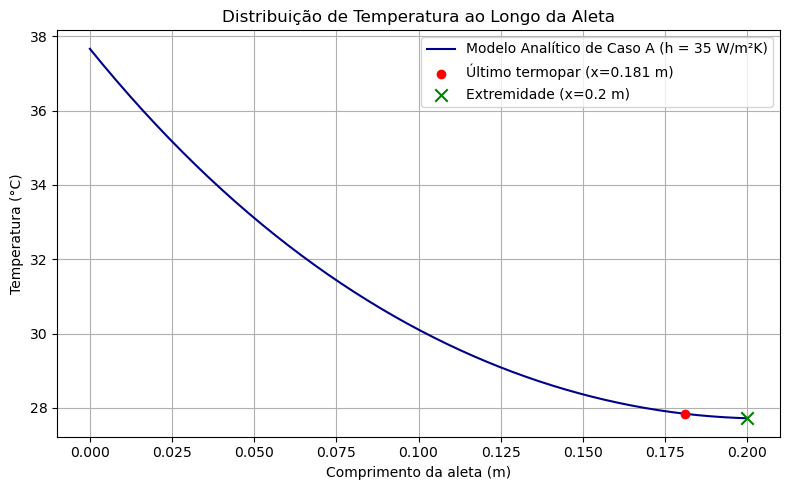

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# Exemplo de ajuste conforme a Figura 3 (Projeto 1)
#------------------------------------------------------------------------------
# ATENÇÃO: Ajuste as variáveis de entrada (T_base, T_amb, etc.)
# de acordo com as medições reais do seu experimento ou planilha.
#------------------------------------------------------------------------------

# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

# Temperaturas (conforme seu experimento)
T_amb  = 16.79944603        # Ajustado conforme medição real
T_base = 37.6603        # Ajuste conforme medição real

# 2) Propriedades do material
k = 154.87675  # [W/m.K] (Alumínio 2014 aproximado)
h = 35   # [W/m².K] estimativa de convecção forçada

# 3) Dimensões da aleta conforme desenho:
#    - Comprimento total ~ 200 mm
#    - Diâmetro nominal ~ 24 mm
L = 0.20      # metros (200 mm)
D = 0.024     # metros (24 mm)
Ac = np.pi*(D/2)**2  # área de seção transversal [m²]
P  = np.pi*D         # perímetro lateral [m]

# 4) Posição do último termopar
#    Conforme o desenho, o último furo está a 181 mm da base esquerda
x_ultimo_termopar = 0.181  # em metros

# 5) Cálculo do parâmetro m
m = np.sqrt( (h * P) / (k * Ac) )

# 6) Solução analítica da distribuição de temperatura
#    (regime estacionário, com T(0)=T_base e convecção na ponta x=L)
x = np.linspace(0, L, 200)

# Excesso de temperatura (theta) = (T - T_amb)
numerador   = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
denominador = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta       = numerador / denominador

# Temperatura absoluta
T_analitico = T_amb + (T_base - T_amb)*theta

# 7) Temperatura no último termopar e na extremidade (ponta) da aleta
T_no_ultimo_termopar  = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade         = T_analitico[-1]  # valor em x=L

# 8) Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico de Caso A (h = {h} W/m²K)", color="darkblue")

# Marcar posição do último termopar
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Marcar extremidade
plt.scatter(L, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={L} m)")

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------
# Observações:
# - O valor de L=0.20 m reflete a dimensão de 200 mm total no desenho.
# - O diâmetro D=0.024 m (24 mm) foi estimado pelo projeto (Figura 3).
# - A posição do último termopar (x=0.181 m) corresponde aos 181 mm indicados.
# - Ajuste T_base, T_amb, h etc. conforme o seu experimento real.
#------------------------------------------------------------------------------


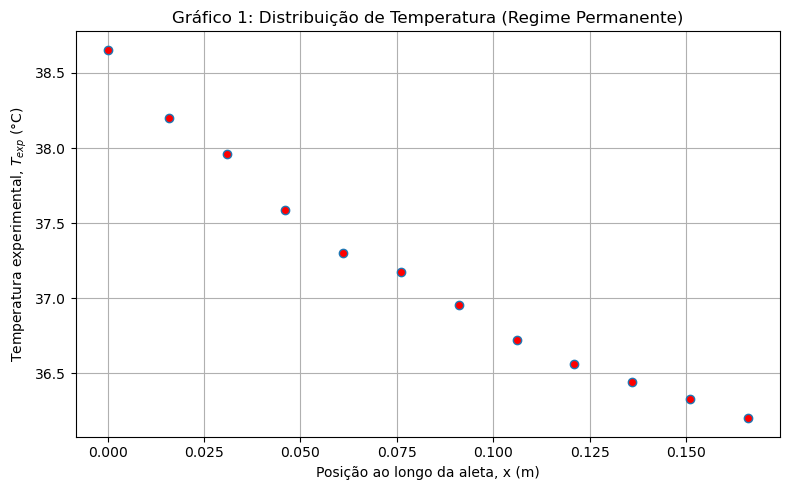

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Definir posições em metros (conforme seu projeto)
posicoes = [
    0.000,  # 102
    0.016,  # 103
    0.031,  # 104
    0.046,  # 105
    0.061,  # 106
    0.076,  # 107
    0.091,  # 108
    0.106,  # 109
    0.121,  # 110
    0.136,  # 111
    0.151,  # 112
    0.166,  # 113
]

# 2) Definir as temperaturas de regime permanente para cada posição
temperaturas_regime = [
    38.6539659,
    38.19681406,
    37.9613098,
    37.58870612,
    37.29912524,
    37.17184537,
    36.95232024,
    36.72467427,
    36.56374458,
    36.44537572,
    36.32803351,
    36.20083494,
]

# 3) Plot
plt.figure(figsize=(8,5))
plt.plot(posicoes, temperaturas_regime, 'o', markerfacecolor='red')
plt.xlabel("Posição ao longo da aleta, x (m)")
plt.ylabel("Temperatura experimental, $T_{exp}$ (°C)")
plt.title("Gráfico 1: Distribuição de Temperatura (Regime Permanente)")
plt.grid(True)
plt.tight_layout()
plt.show()


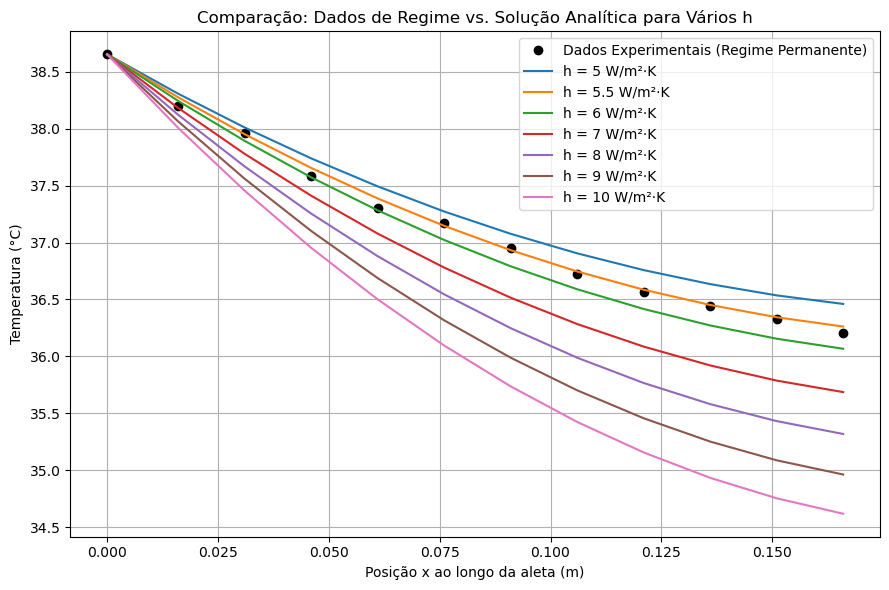

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) CARREGAR O ARQUIVO (SE PRECISAR DE OUTROS DADOS, MAS NÃO USAREMOS AQUI PARA A MÉDIA)
# ------------------------------------------------------------------------------
# df = pd.read_excel("sistema1.xlsx")
# (Podemos ler se quisermos examinar outras colunas, mas já temos as médias de regime.)

# ------------------------------------------------------------------------------
# 2) DEFINIR POSIÇÕES E TEMPERATURAS EXPERIMENTAIS (REGIME PERMANENTE)
# ------------------------------------------------------------------------------
#   - Posições:  canal 102 em x=0, canal 103 em x=0.016, etc.
#   - Temperaturas: as médias de regime fornecidas (na mesma ordem).
posicoes_exp = [
    0.000,  # 102
    0.016,  # 103
    0.031,  # 104
    0.046,  # 105
    0.061,  # 106
    0.076,  # 107
    0.091,  # 108
    0.106,  # 109
    0.121,  # 110
    0.136,  # 111
    0.151,  # 112
    0.166,  # 113
    # Se existir canal 114, acrescente aqui, ex. 0.181
]

temperaturas_exp = [
    38.6539659,  # 102 (°C)
    38.19681406, # 103
    37.9613098,  
    37.58870612, 
    37.29912524, 
    37.17184537, 
    36.95232024, 
    36.72467427, 
    36.56374458, 
    36.44537572, 
    36.32803351, 
    36.20083494,
    # Se existir canal 114, acrescente aqui
]

# ------------------------------------------------------------------------------
# 3) DEFINIR PARÂMETROS DO PROBLEMA
# ------------------------------------------------------------------------------
T_amb  = 16.79944603      # Temperatura ambiente (°C)
T_base = 38.6539659          # Temperatura na base da aleta (°C)
k = 154.87675             # [W/m·K] - condutividade do alumínio 2014 (aprox.)

# Dimensões da aleta
L = 0.20   # Comprimento total = 0,20 m
D = 0.024  # Diâmetro = 24 mm
Ac = np.pi*(D/2)**2  # Área da seção transversal
P  = np.pi*D         # Perímetro lateral

# Lista de valores de h (W/m²·K) para testar
h_values = [5, 5.5, 6, 7, 8, 9, 10]

# ------------------------------------------------------------------------------
# 4) FUNÇÃO PARA CALCULAR T_ANALÍTICO EM QUALQUER PONTO x, DADO h
# ------------------------------------------------------------------------------
def T_aleta(x, h):
    """
    Retorna a temperatura analítica na posição x (m),
    dada T_base, T_amb, condutividade k, etc.
    Condição de ponta convectiva (x=L).
    """
    # Cálculo de m
    m_val = np.sqrt((h * P) / (k * Ac))
    
    # F1 e F2 (fatores para solução analítica)
    F1 = np.cosh(m_val*(L - x)) + (h/(m_val*k))*np.sinh(m_val*(L - x))
    F2 = np.cosh(m_val*L)       + (h/(m_val*k))*np.sinh(m_val*L)
    
    # T(x)
    return T_amb + (T_base - T_amb)*(F1 / F2)

# ------------------------------------------------------------------------------
# 5) PLOTAR OS DADOS EXPERIMENTAIS + CURVAS ANALÍTICAS PARA VÁRIOS h
# ------------------------------------------------------------------------------
plt.figure(figsize=(9, 6))

# (5a) Plot dos pontos experimentais de regime permanente
plt.plot(posicoes_exp, temperaturas_exp, 'o',
         color='black', label='Dados Experimentais (Regime Permanente)')

# (5b) Para cada valor de h, calcular T_analitico e plotar
for h in h_values:
    # Se quiser uma curva suave, poderíamos usar uma malha fina em x:
    # x_fino = np.linspace(0, L, 100)
    # T_modelo = [T_aleta(xx, h) for xx in x_fino]
    # plt.plot(x_fino, T_modelo, '-', label=f"h={h}")

    # Mas, para comparar ponto a ponto com os mesmos x dos termopares:
    T_modelo_nos = [T_aleta(xp, h) for xp in posicoes_exp]
    plt.plot(posicoes_exp, T_modelo_nos, '-',
             label=f"h = {h} W/m²·K")

plt.xlabel("Posição x ao longo da aleta (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Comparação: Dados de Regime vs. Solução Analítica para Vários h")
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


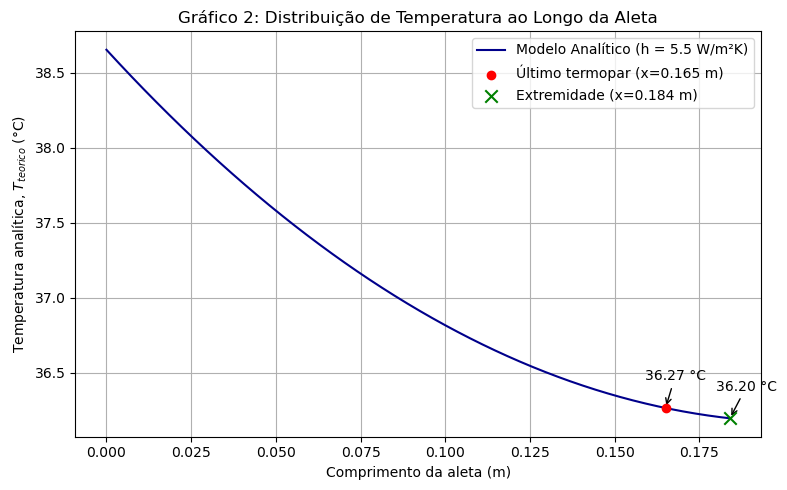

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# 1) Leitura de dados experimentais (ajustar conforme necessário)
df = pd.read_excel("sistema1.xlsx")

# 2) Parâmetros de entrada
T_base = 38.6539659       # °C
T_amb  = 16.79944603      # °C
k = 154.87675             # W/m.K
h = 5.5                   # W/m².K (estimativa para convecção)
L = 0.20                  # m (200 mm)
D = 0.024                 # m (24 mm)
Ac = np.pi*(D/2)**2
P  = np.pi*D

# Posição do último termopar
x_ultimo_termopar = 0.165  # m

#------------------------------------------------------------------------------
# 3) Cálculo do modelo analítico
#------------------------------------------------------------------------------
m = np.sqrt((h * P) / (k * Ac))

# Vamos gerar x de 0 a L (ou, se quiser, 0 a 0.184, mas aqui usaremos 0 a L)
x = np.linspace(0, 0.184, 200)

F1 = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
F2 = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta = F1 / F2  # fração do deltaT (T_base - T_amb)

T_analitico = T_amb + (T_base - T_amb)*theta

# Temperatura no último termopar e na extremidade
T_no_ultimo_termopar = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade        = T_analitico[-1]  # valor em x=L

#------------------------------------------------------------------------------
# 4) Gráfico
#------------------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")

# Posição do último termopar (vermelho)
plt.scatter(x_ultimo_termopar, T_no_ultimo_termopar,
            color='red', zorder=5,
            label=f"Último termopar (x={x_ultimo_termopar:.3f} m)")

# Adiciona anotação (temperatura) ao lado do último termopar
plt.annotate(f"{T_no_ultimo_termopar:.2f} °C",
             (x_ultimo_termopar, T_no_ultimo_termopar),
             xytext=(-15, 20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Posição da extremidade (verde)
plt.scatter(0.184, T_extremidade,
            color='green', marker='x', s=80, zorder=5,
            label=f"Extremidade (x={0.184:.3f} m)")

# Anotar a temperatura na extremidade
plt.annotate(f"{T_extremidade:.2f} °C",
             (0.184, T_extremidade),
             xytext=(-10, 20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.xlabel("Comprimento da aleta (m)")
plt.ylabel("Temperatura analítica, $T_{teorico}$ (°C)")
plt.title("Gráfico 2: Distribuição de Temperatura ao Longo da Aleta")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Concluído em 698 iterações.
Erro máximo na última iteração: 9.99e-04
Δx = 0.0153 m,  Δt = 1.4930e+00 s


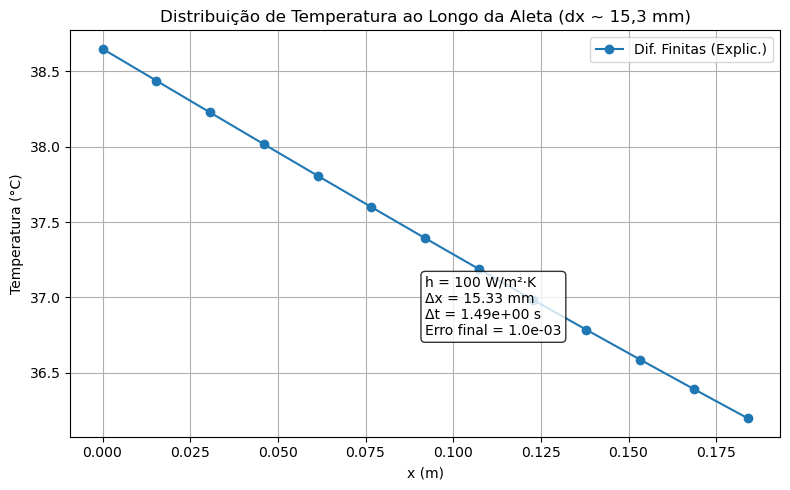

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# PARÂMETROS FÍSICOS E GEOMÉTRICOS
# ---------------------------------------------------------------------------
L   = 0.184        # 184 mm como comprimento total da aleta (m)
D   = 0.024        # 24 mm de diâmetro (m)
k   = 154.87675    # Condutividade térmica (W/m·K)
h   = 100          # Coef. de convecção (W/m²·K)
rho = 2794         # Densidade (kg/m³)
cp  = 880          # Calor específico (J/kg·K)

T_amb   = 16.8     # Temperatura ambiente (°C)
T_base  = 38.65    # Temperatura na base (°C)

# ---------------------------------------------------------------------------
# MALHA DE DIFERENÇAS FINITAS
# ---------------------------------------------------------------------------
Nx = 13                       # Total de nós = 13 -> 12 intervalos
dx = L / (Nx - 1)            # Espaçamento (~ 0.01533 m ≈ 15.33 mm)
A  = np.pi * (D/2)**2        # Área de seção transversal
P  = np.pi * D               # Perímetro
alpha = k / (rho * cp)       # Difusividade térmica (m²/s)

# Critério de estabilidade para esquema explícito (opcional):
dt = 0.8 * (dx**2) / (2*alpha)

# ---------------------------------------------------------------------------
# VETORES DE TEMPERATURA: Nx posições
# ---------------------------------------------------------------------------
# Inicializando: aqui coloco tudo em 17 °C para "chute inicial"
T_old = np.full(Nx, 17.0)
# Ajustando o nó 0 (x=0) para T_base
T_old[0] = T_base

T_new = T_old.copy()

# ---------------------------------------------------------------------------
# CRITÉRIOS DE PARADA
# ---------------------------------------------------------------------------
max_iter = 10000    
tol      = 1.0e-3  
erro_max = 1.0
n_iter   = 0

# ---------------------------------------------------------------------------
# LOOP NO TEMPO
# ---------------------------------------------------------------------------
while (n_iter < max_iter) and (erro_max > tol):
    for i in range(1, Nx-1):
        T_new[i] = (T_old[i] 
                    + alpha * dt / dx**2
                      * (T_old[i+1] - 2*T_old[i] + T_old[i-1]))

    # BC 1: Base em x=0 (temperatura fixa)
    T_new[0] = T_base
    
    # BC 2: Extremidade em x=L (convecção)
    i = Nx - 1
    a = alpha * dt / dx**2
    T_new[i] = ( T_old[i]
                 + a*(2*T_old[i-1] - 2*T_old[i])
                 + 2*alpha*(dt/dx)*(h/k)*(T_amb - T_old[i]) )

    # Erro e atualização
    erro_max = np.max(np.abs(T_new - T_old))
    T_old[:] = T_new[:]
    n_iter  += 1

# ---------------------------------------------------------------------------
# RESULTADO
# ---------------------------------------------------------------------------
print(f"Concluído em {n_iter} iterações.")
print(f"Erro máximo na última iteração: {erro_max:.2e}")
print(f"Δx = {dx:.4f} m,  Δt = {dt:.4e} s")

# ---------------------------------------------------------------------------
# GRÁFICO DA SOLUÇÃO NUMÉRICA
# ---------------------------------------------------------------------------
x_coords = np.linspace(0, L, Nx)
plt.figure(figsize=(8,5))
plt.plot(x_coords, T_new, '-o', label="Dif. Finitas (Explic.)")

plt.title("Distribuição de Temperatura ao Longo da Aleta (dx ~ 15,3 mm)")
plt.xlabel("x (m)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend()

# Box com dados do problema
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
msg = (f"h = {h} W/m²·K\n"
       f"Δx = {dx*1000:.2f} mm\n"
       f"Δt = {dt:.2e} s\n"
       f"Erro final = {erro_max:.1e}")
plt.text(0.50, 0.25, msg, transform=plt.gca().transAxes, bbox=props)

plt.tight_layout()
plt.show()


Nós: 13, Δx ≈ 0.0153 m
dt_max ≈ 1.8662e+00 s; escolhendo dt = 9.3312e-01 s
Concluído em 2414 iterações.
Erro máximo final = 9.955e-07


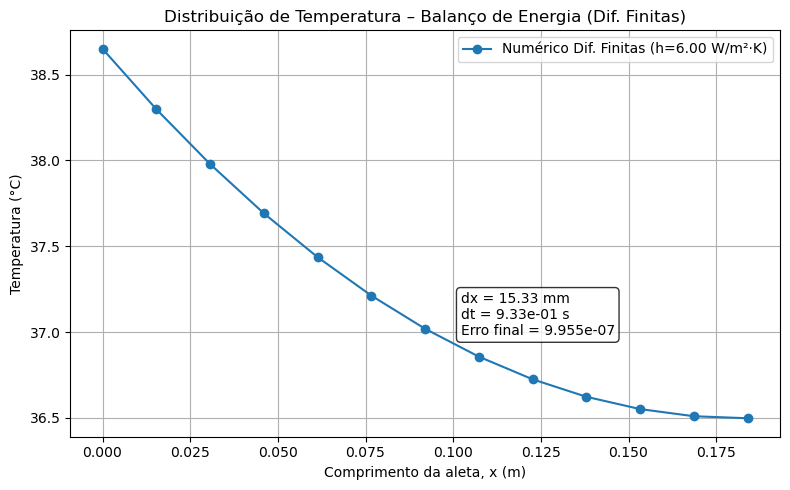

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) PARÂMETROS FÍSICOS E GEOMÉTRICOS
# ---------------------------------------------------------
L   = 0.184        # [m] comprimento total da aleta
D   = 0.024        # [m] diâmetro (24 mm)
k   = 154.87675    # [W/m.K] condutividade
rho = 2794         # [kg/m³] densidade
cp  = 880          # [J/kg.K] calor específico
h   = 6            # [W/m².K] coeficiente de convecção

T_amb  = 16.8      # [°C] temperatura ambiente
T_base = 38.65     # [°C] temperatura na base da aleta

# Área de seção transversal A e perímetro P (para aleta cilíndrica)
r = D / 2
A = np.pi * r**2
P = 2.0 * np.pi * r

# Difusividade térmica
alpha = k / (rho * cp)

# ---------------------------------------------------------
# 2) DISCRETIZAÇÃO ESPACIAL E TEMPORAL
# ---------------------------------------------------------
N = 13                    # número total de nós
dx = L / (N - 1)          # espaçamento entre nós
# Critério de estabilidade do esquema explícito: dt <= dx²/(2 alpha)
dt_max = dx**2 / (2.0 * alpha)
dt = 0.5 * dt_max         # escolher dt menor que o máximo para maior segurança

print(f"Nós: {N}, Δx ≈ {dx:.4f} m")
print(f"dt_max ≈ {dt_max:.4e} s; escolhendo dt = {dt:.4e} s")

# ---------------------------------------------------------
# 3) MONTAGEM DAS EQUAÇÕES
# ---------------------------------------------------------
# Equação transiente 1D com termo de convecção distribuído:
#   ρ c_p dT/dt = k d²T/dx² - (hP/A)(T - T_amb)
# ou
#   T_i^{n+1} = T_i^n + dt [ alpha*(T_{i+1}^n - 2T_i^n + T_{i-1}^n)/dx² 
#                            - (hP)/(ρ c_p A) (T_i^n - T_amb) ]

beta = (h * P) / (rho * cp * A)  # [1/s] fator do termo convectivo

# ---------------------------------------------------------
# 4) CONDIÇÃO INICIAL
# ---------------------------------------------------------
# Inicialmente, supomos a aleta inteira em T_amb (exceto a base)
T_old = np.full(N, T_amb, dtype=float)
T_old[0] = T_base  # base em T_base

# ---------------------------------------------------------
# 5) LOOP DE ITERAÇÕES NO TEMPO
# ---------------------------------------------------------
max_iter = 200000
tol = 1.0e-6
erro_max = 1.0
n_iter = 0

while (n_iter < max_iter) and (erro_max > tol):
    T_new = T_old.copy()

    # Atualiza cada nó interno (1..N-2)
    for i in range(1, N-1):
        T_new[i] = (T_old[i]
                    + dt*(
                        alpha*(T_old[i+1] - 2*T_old[i] + T_old[i-1])/(dx**2)
                        - beta*(T_old[i] - T_amb)
                    )
                   )
    # CC 1: Base (x=0), T(0)=T_base
    T_new[0] = T_base

    # CC 2: extremidade (x=L) com convecção:
    #  -k (T[L] - T[L-1])/dx = h ( T[L] - T_amb )
    # => T[L] = [ T[L-1] + (h dx / k) T_amb ] / [ 1 + (h dx / k) ]
    # mas lembre-se do termo transiente tbm. Para simplificar:
    #   T_new[N-1] = T_old[N-1] + ...
    #   mas podemos usar a forma "nodal" do fluxo convectivo.
    # 
    # Uma forma simples (explicitamente):
    #   T_new[L] = T_old[L] + dt [ alpha*(T_old[L-1] - T_old[L])/dx²*2 (nó fictício)
    #                              - beta*(T_old[L] - T_amb) ]
    # OU podemos implementar a equação clássica do "nó fictício".
    #
    # Abaixo adotamos a abordagem "explicit flux" que aparecia no seu modelo:
    i = N-1
    # Difusão condutiva (usando nó fictício => T[i+1] = T[i-1] - 2 dx * h/k * (T[i] - T_amb)?)
    # Aqui, porém, para simplificar, use a formula "semi-implícita" do BC convectivo:
    # T_n+1[L] = ( T_n[L-1] + (h dx/k) T_amb ) / (1 + h dx/k)
    # +  termos de -beta*(T[L]-T_amb)? Vamos usar a forma já existente no seu script:
    T_new[i] = (T_old[i-1] + (h*dx/k)*T_amb) / (1 + (h*dx/k))

    # Calcula erro e prepara para próxima iteração
    erro_max = np.max(np.abs(T_new - T_old))
    T_old[:] = T_new[:]
    n_iter += 1

print(f"Concluído em {n_iter} iterações.")
print(f"Erro máximo final = {erro_max:.3e}")

# ---------------------------------------------------------
# 6) RESULTADOS E PLOT
# ---------------------------------------------------------
x_grid = np.linspace(0, L, N)
plt.figure(figsize=(8, 5))
plt.plot(x_grid, T_new, marker='o', linestyle='-',
         label=f"Numérico Dif. Finitas (h={h:.2f} W/m²·K)")
plt.xlabel("Comprimento da aleta, x (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura – Balanço de Energia (Dif. Finitas)")
plt.grid(True)
plt.legend()

# Caixa com info
info = (f"dx = {dx*1000:.2f} mm\n"
        f"dt = {dt:.2e} s\n"
        f"Erro final = {erro_max:.3e}")
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
plt.text(0.55, 0.25, info, transform=plt.gca().transAxes, bbox=props)

plt.tight_layout()
plt.show()


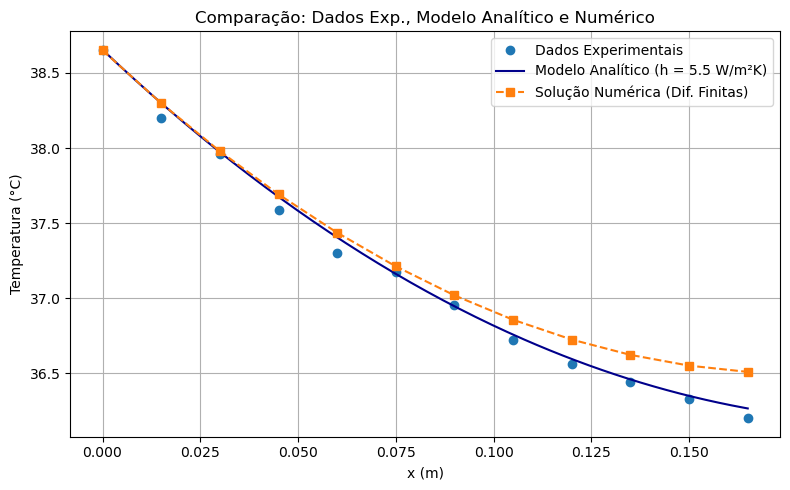

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#--------------------------------------------------------------
# 1) DADOS EXPERIMENTAIS
#--------------------------------------------------------------
# Exemplo: 12 medições experimentais (posições em [m], temperaturas em [°C])
posicoes_exp = np.array([
    0.000,  0.015,  0.03,  0.045,
    0.06,  0.075,  0.09,  0.105,
    0.12,  0.135,  0.15,  0.165,
])
T_exp = np.array([
    38.6539659, 38.19681406, 37.9613098, 37.58870612,
    37.29912524, 37.17184537, 36.95232024, 36.72467427,
    36.56374458, 36.44537572, 36.32803351, 36.20083494
])

#--------------------------------------------------------------
# 2) SOLUÇÃO ANALÍTICA
#--------------------------------------------------------------
# Exemplo: para x variando até 0.20 m (ou 0.184 m, conforme seu caso).
# Vamos supor que você já tenha essas duas variáveis (x_anal, T_analitico)
# provenientes de um script anterior:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("sistema1.xlsx")

T_base = 38.6539659       # °C
T_amb  = 16.79944603      # °C
k = 154.87675             # W/m.K
h = 5.5                   # W/m².K (estimativa para convecção)
L = 0.20                  # m (200 mm)
D = 0.024                 # m (24 mm)
Ac = np.pi*(D/2)**2
P  = np.pi*D

# Posição do último termopar
x_ultimo_termopar = 0.165  # m

m = np.sqrt((h * P) / (k * Ac))

# Vamos gerar x de 0 a L (ou, se quiser, 0 a 0.184, mas aqui usaremos 0 a L)
x = np.linspace(0, 0.165, 200)

F1 = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
F2 = np.cosh(m*L)       + (h/(m*k))*np.sinh(m*L)
theta = F1 / F2  # fração do deltaT (T_base - T_amb)

T_analitico = T_amb + (T_base - T_amb)*theta

# Temperatura no último termopar e na extremidade
T_no_ultimo_termopar = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade        = T_analitico[-1]  # valor em x=L



#--------------------------------------------------------------
# 3) SOLUÇÃO NUMÉRICA
#--------------------------------------------------------------
# Supondo que você tenha rodado seu método de diferenças finitas
# e obteve um vetor T_num em Nx pontos x_num (por exemplo Nx=12 ou Nx=13).
# Aqui, mostramos um exemplo genérico:
x_num = np.linspace(0, 0.165, Nx-1)
# Exemplo de vetor T_num (ou T_new) que você obteve no final:
T_num = T_new[0:12]  # ou T_num = T_new[:]
# (T_new é o vetor de temperaturas calculado no loop do método numérico)

#--------------------------------------------------------------
# 4) PLOT ÚNICO: Dados Exp. + Analítico + Numérico
#--------------------------------------------------------------
plt.figure(figsize=(8,5))

# a) Dados experimentais
plt.plot(posicoes_exp, T_exp, 'o',
         label='Dados Experimentais')

# b) Solução analítica (linha contínua)
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")

# c) Solução numérica (linha tracejada, com marcadores)
plt.plot(x_num, T_num, '--s',
         label='Solução Numérica (Dif. Finitas)')

# Personalizações
plt.xlabel("x (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Comparação: Dados Exp., Modelo Analítico e Numérico")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
